In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



df = pd.read_csv('student-mat.csv')
print(df.shape)
print(df.columns)
df = df.drop(['famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'], axis = 1)
df['address'] = LabelEncoder().fit_transform(df['address'])
df['schoolsup'] = LabelEncoder().fit_transform(df['schoolsup'])
df['famsup'] = LabelEncoder().fit_transform(df['famsup'])
df['paid'] = LabelEncoder().fit_transform(df['paid'])
df['activities'] = LabelEncoder().fit_transform(df['activities'])
df['nursery'] = LabelEncoder().fit_transform(df['nursery'])
df['higher'] = LabelEncoder().fit_transform(df['higher'])
df['internet'] = LabelEncoder().fit_transform(df['internet'])
df['romantic'] = LabelEncoder().fit_transform(df['romantic'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['school'] = LabelEncoder().fit_transform(df['school'])

#df['sex'] = pd.Categorical(df['sex'])


(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [202]:
X = df.drop(['sex'], axis = 1)
y = df['sex']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


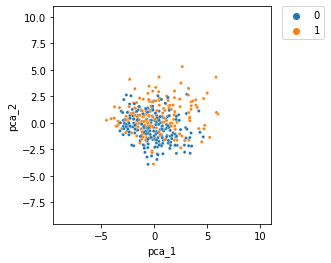

In [203]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

c:\users\nasten4ik\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\nasten4ik\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


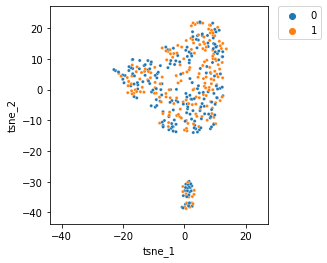

In [204]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

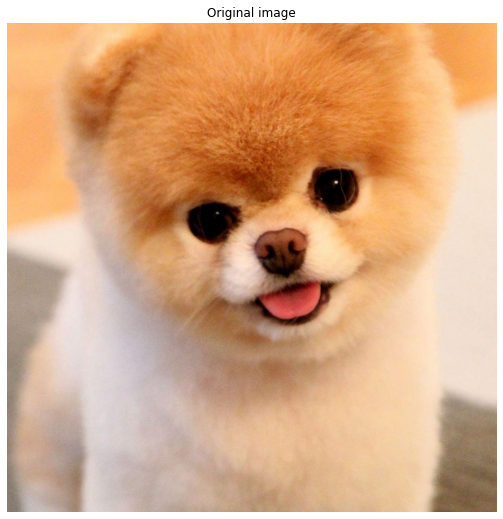

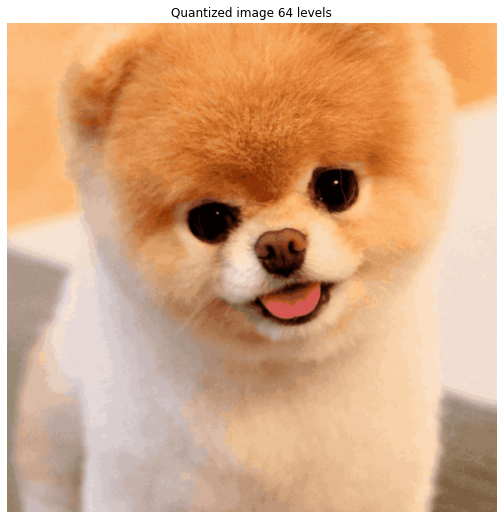

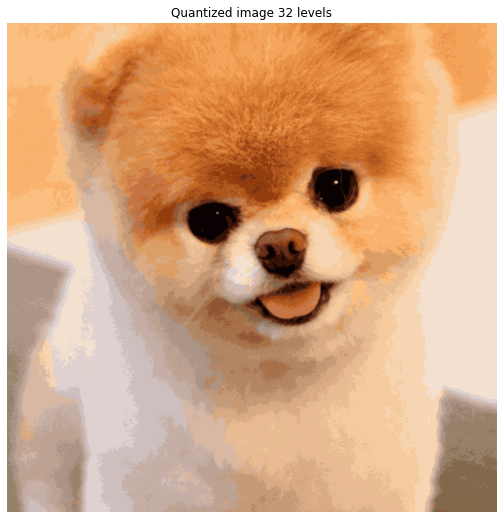

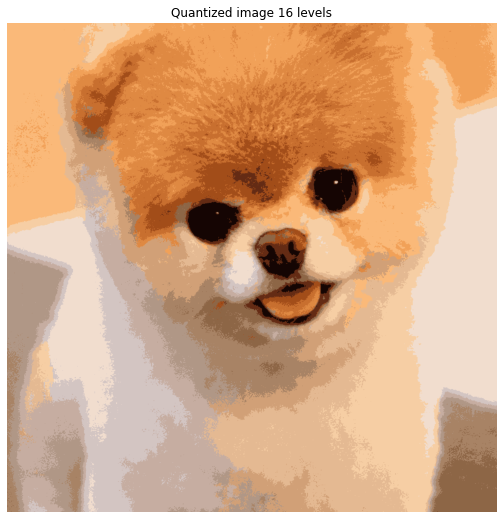

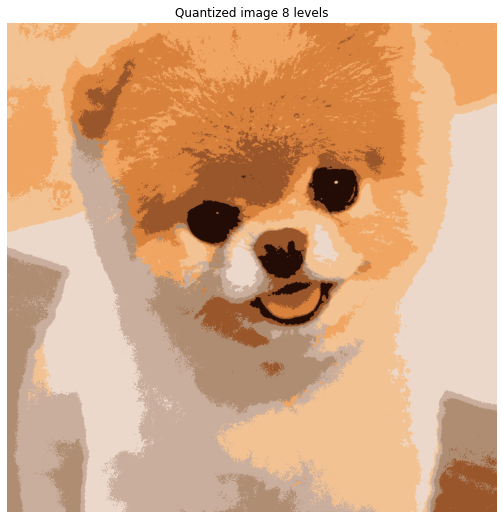

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image
from sklearn.utils import shuffle
from time import time

n_colors = [64, 32, 16, 8]
SUBSAMPLE_SIZE = 0.01

image = Image.open('shpitz.jpg')
image = np.array(image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))
img_subsample = image_array[np.random.choice(w * h, int(w * h* SUBSAMPLE_SIZE)), :]

models = []
for colors in n_colors:
    kmeans = KMeans(n_clusters=colors).fit(img_subsample)
    models.append(kmeans)
    
plt.figure(figsize=(16,9))
plt.axis('off')
plt.title('Original image')
plt.imshow(image) 

for model in models:
    labels = model.predict(image_array)
    plt.figure(figsize=(16,9))
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image {model.get_params().get("n_clusters")} levels')
    plt.imshow(recreate_image(model.cluster_centers_, labels, w, h))

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

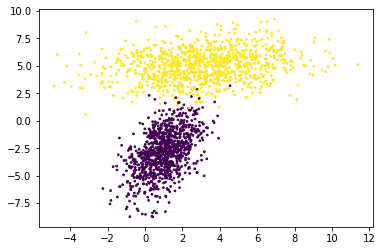

In [207]:
num_points = 1000

mean_1 = [1, -3]
cov_1 = [[1, 1], [1, 4]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [3, 5]
cov_2 = [[7, 1], [1, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] * num_points)


X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

For n_clusters = 2  silhouette average: 0.623613673492009
For n_clusters = 3  silhouette average: 0.5210042979644196
For n_clusters = 4  silhouette average: 0.418338167032598
For n_clusters = 5  silhouette average: 0.37865945719688476
means 
[[ 1.01993653 -2.87374862]
 [ 3.11692097  4.99964145]]
covariances 
[[[0.98150333 0.99408079]
  [0.99408079 3.91879044]]

 [[6.53305163 0.79279707]
  [0.79279707 1.97605114]]]


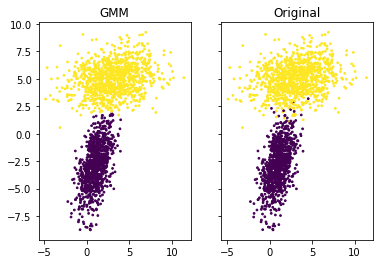

In [208]:
for i in range(2, 6):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

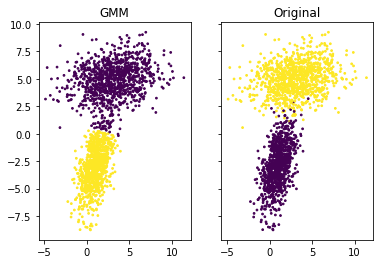

In [209]:
GMM = GaussianMixture(n_components=2, covariance_type='spherical')
GMM.fit(X)

labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [210]:
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

#pd.set_option('max_colwidth', 400)

In [211]:
columns_name = ['Show Number', ' Air Date', 'round', ' Category', ' Value', 'question', 'answer']
data = pd.read_csv('JEOPARDY_CSV.csv', names=columns_name)
data = data.drop(0)
data = data.drop(columns = ['Show Number', ' Air Date', ' Category', ' Value'])
data.head()

c:\users\nasten4ik\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


round  \
1  Jeopardy!   
2  Jeopardy!   
3  Jeopardy!   
4  Jeopardy!   
5  Jeopardy!   

                                                                                                      question  \
1             For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory   
2  No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves   
3                     The city of Yuma in this state has a record average of 4,055 hours of sunshine each year   
4                         In 1963, live on "The Art Linkletter Show", this company served its billionth burger   
5     Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States   

       answer  
1  Copernicus  
2  Jim Thorpe  
3     Arizona  
4  McDonald's  
5  John Adams

In [212]:
data['question'] = data['question'].str.lower()
data['question'] = data['question'].str.strip()
data['question'] = data['question'].str.replace('\d+','NUMBER', regex=True)
#x = data[' Question']

In [213]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

data['question'] = data['question'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasten4ik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasten4ik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [214]:
table = str.maketrans('', '', string.punctuation)
data['question'] = data['question'].str.translate(table)

In [215]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['question'] = data['question'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nasten4ik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [216]:
data

round  \
1              Jeopardy!   
2              Jeopardy!   
3              Jeopardy!   
4              Jeopardy!   
5              Jeopardy!   
...                  ...   
216926  Double Jeopardy!   
216927  Double Jeopardy!   
216928  Double Jeopardy!   
216929  Double Jeopardy!   
216930   Final Jeopardy!   

                                                                                                question  \
1                                        last NUMBER year life galileo house arrest espousing man theory   
2       no NUMBER NUMBER olympian football star carlisle indian school NUMBER mlb season red giant brave   
3                                         city yuma state record average NUMBERNUMBER hour sunshine year   
4                                    NUMBER live the art linkletter show company served billionth burger   
5                                signer dec indep framer constitution mass second president united state   
...                                                                                                  ...   
216926                                           puccini opera turn solution NUMBER riddle posed heroine   
216927                        north america term properly applied NUMBER specie crested including tufted   
216928                       penny lane hellraiser grew up barber shave another customerthen flays alive   
216929                                ft sill okla made plea arizona land home father land ask to return   
216930               silent movie title includes last name NUMBERth c statesman favorite catherine great   

                                answer  
1                           Copernicus  
2                           Jim Thorpe  
3                              Arizona  
4                           McDonald's  
5                           John Adams  
...                                ...  
216926                        Turandot  
216927                      a titmouse  
216928                    Clive Barker  
216929                        Geronimo  
216930  Grigori Alexandrovich Potemkin  

[216930 rows x 3 columns]

In [221]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

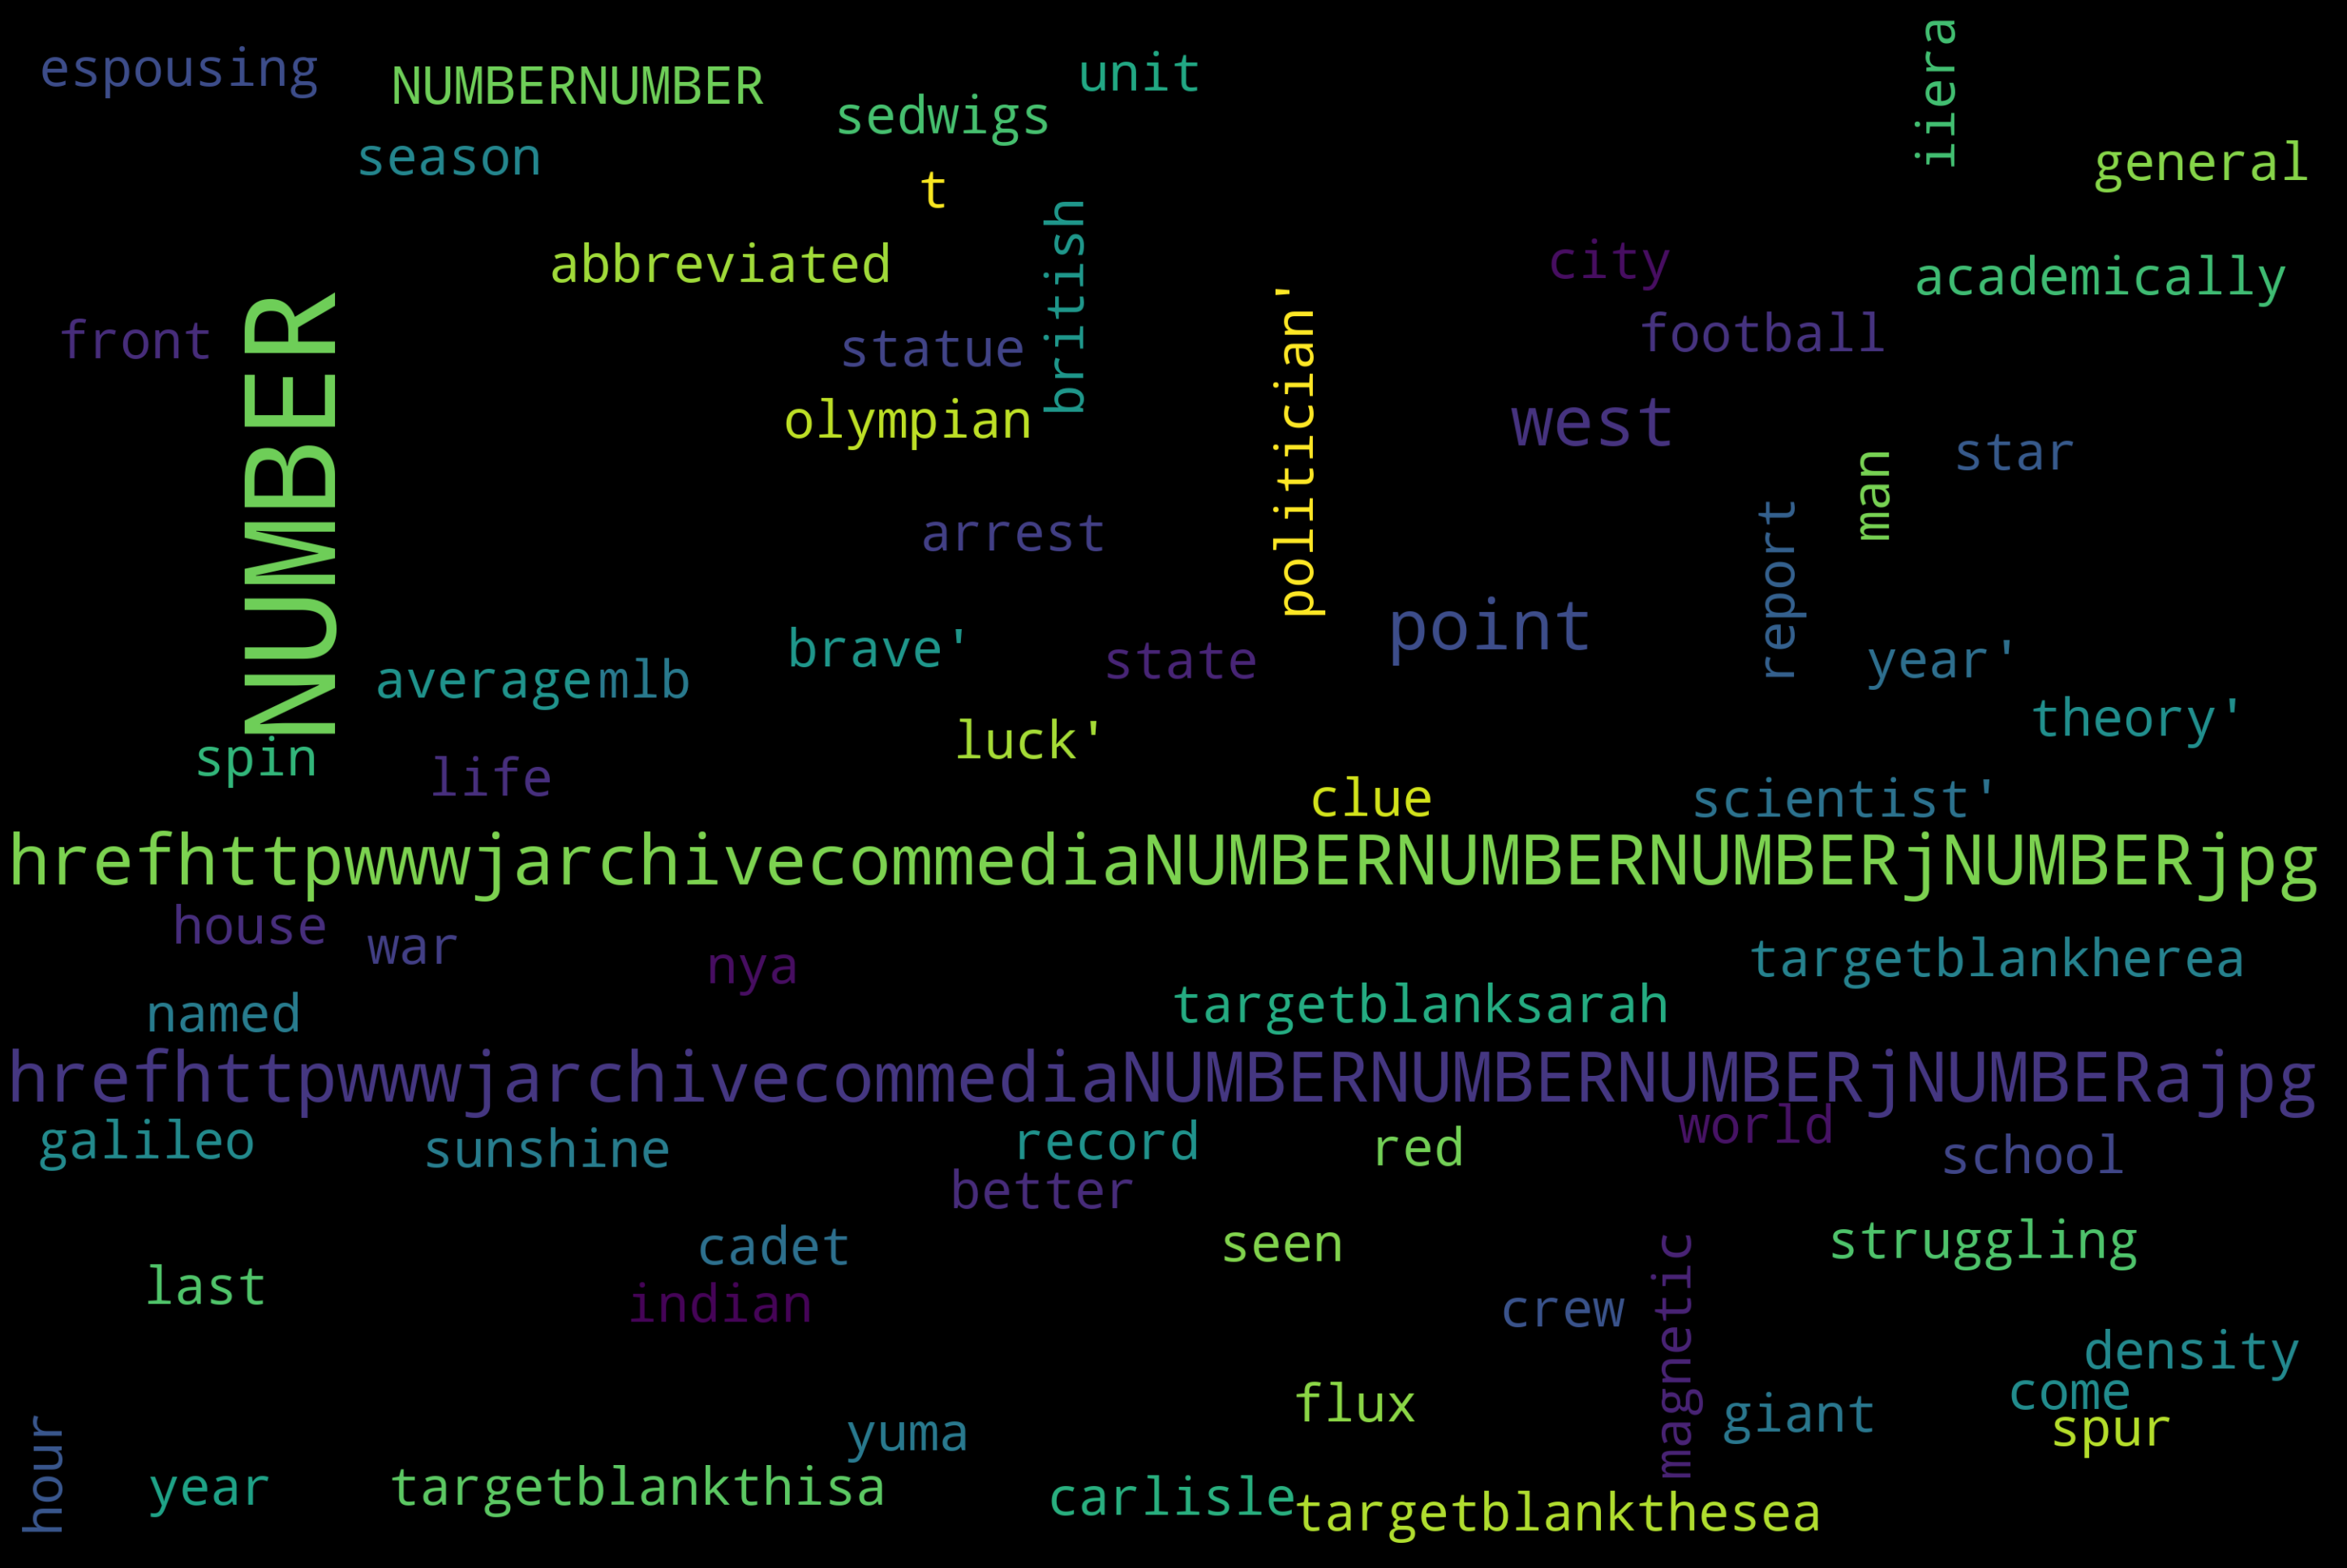

In [222]:
generate_word_cloud(data[data['round']=='Jeopardy!'].question.values)

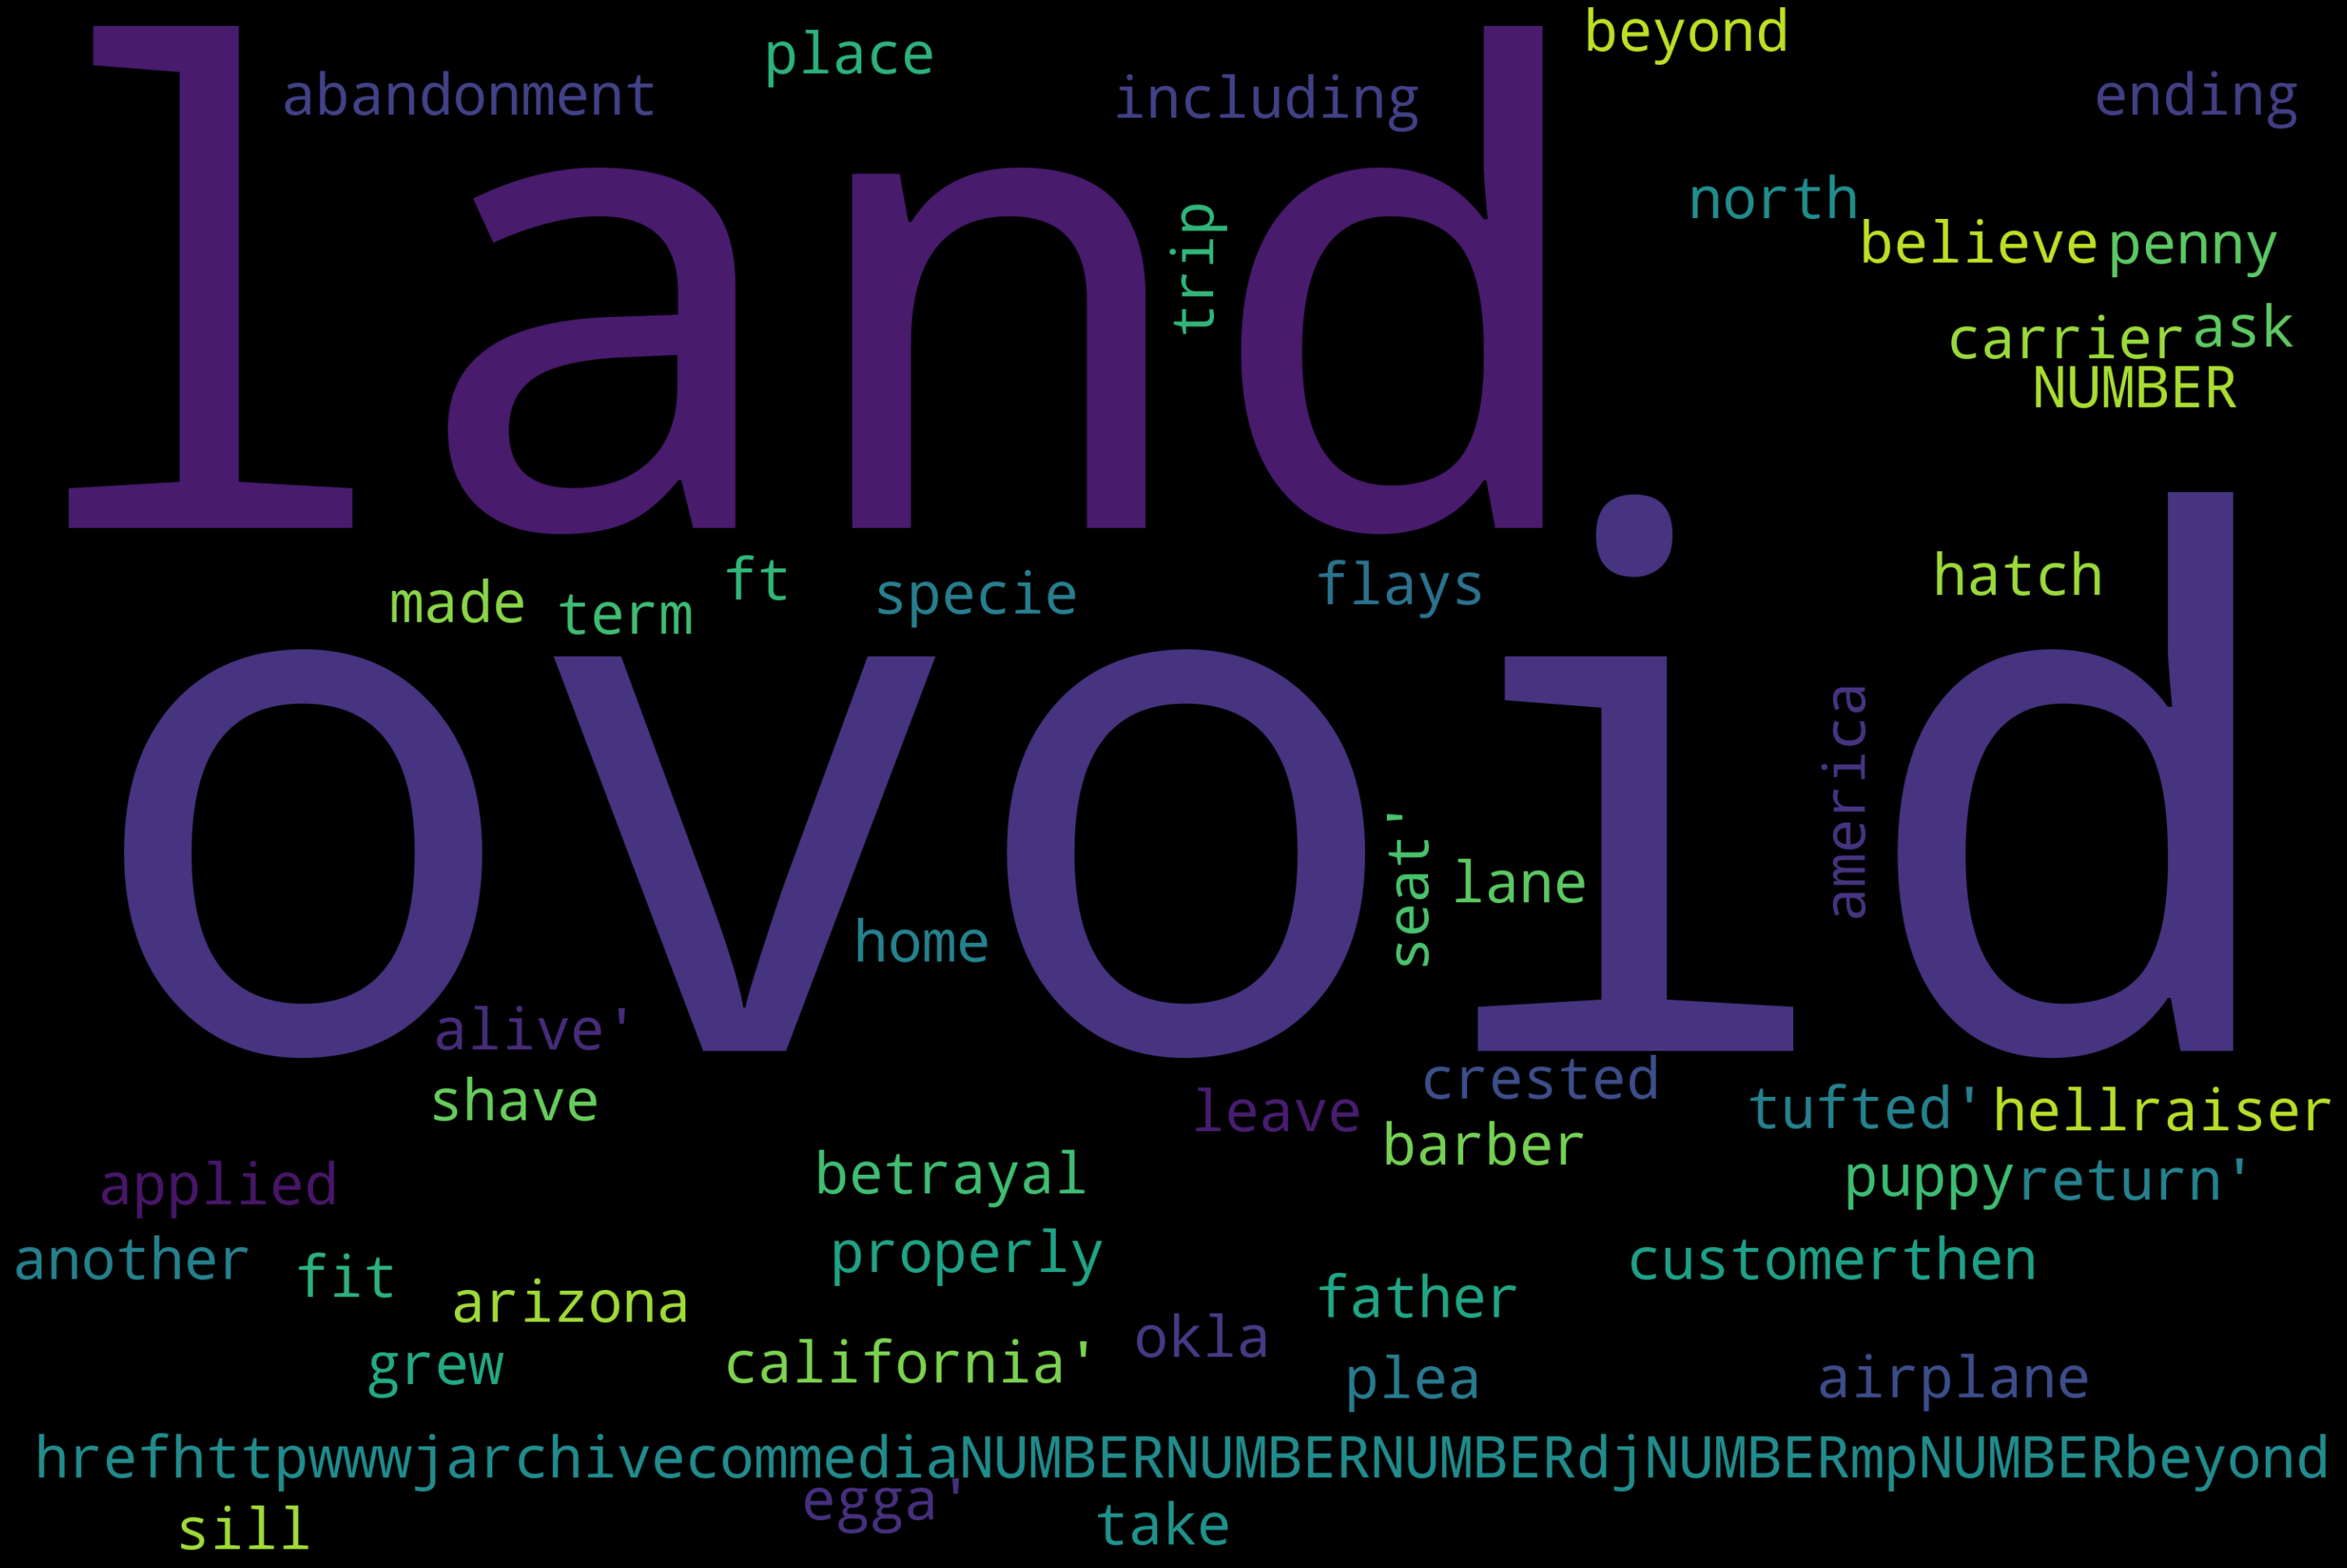

In [223]:
generate_word_cloud(data[data['round']=='Double Jeopardy!'].question.values)

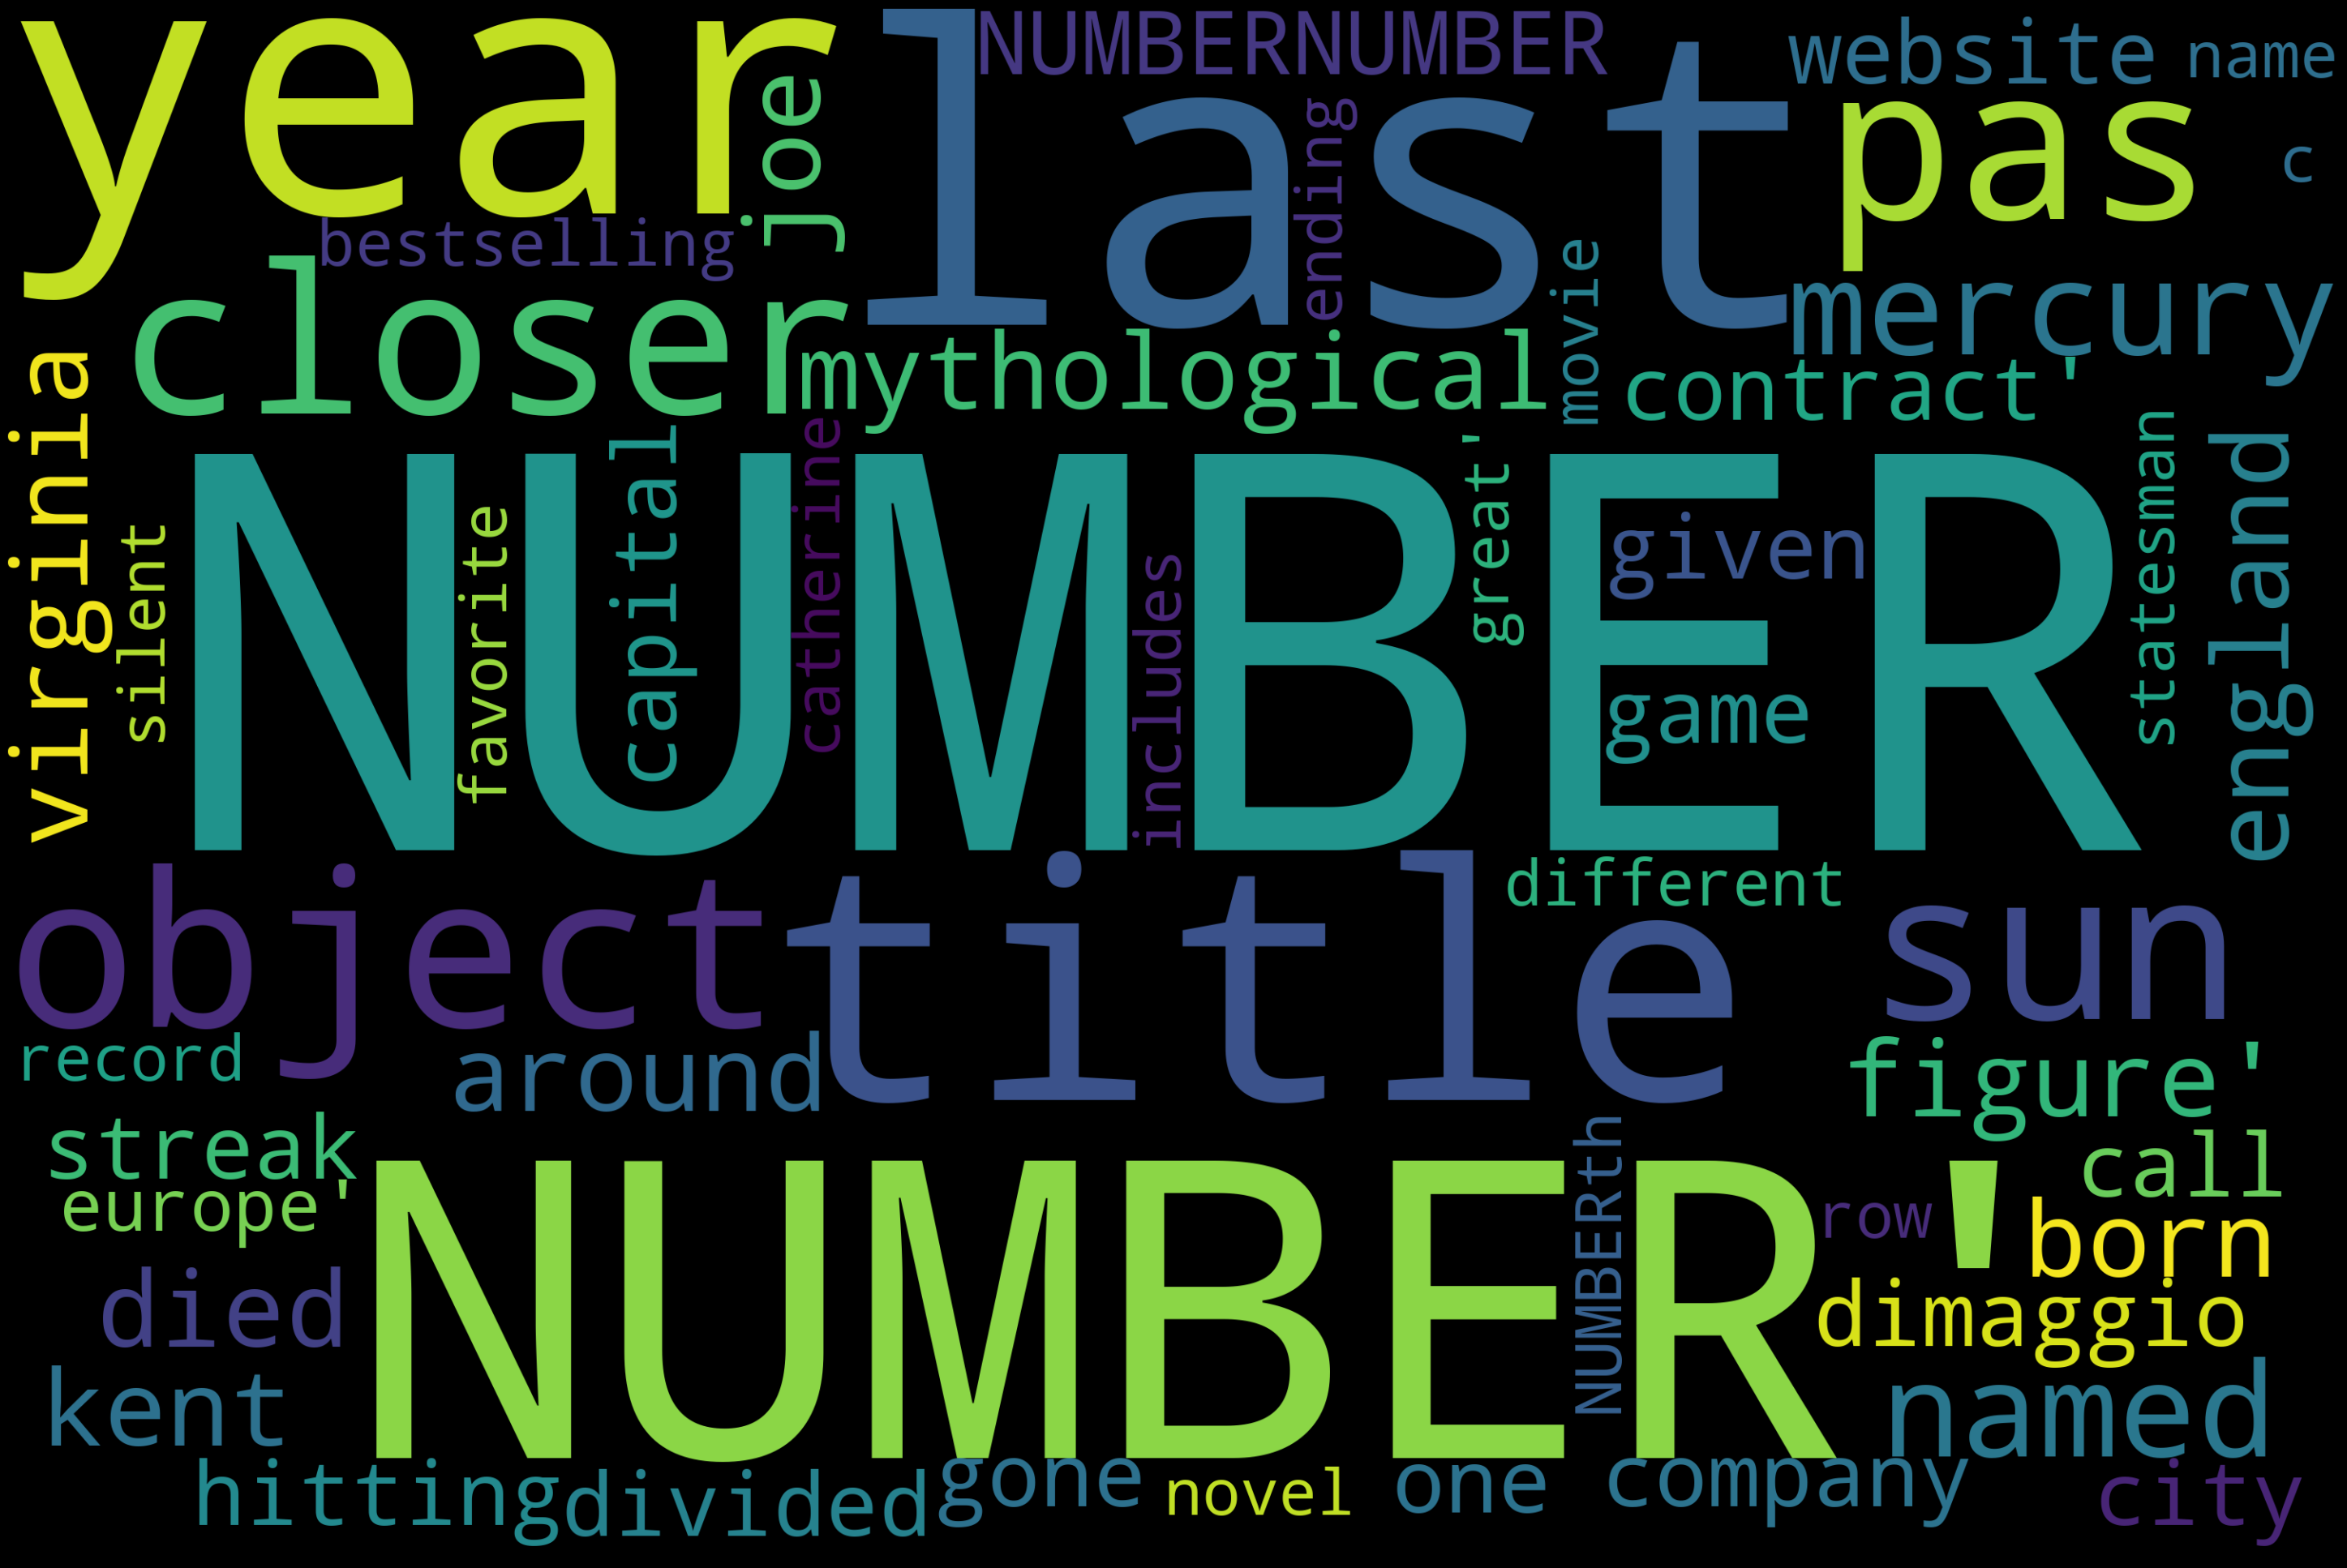

In [224]:
generate_word_cloud(data[data['round']=='Final Jeopardy!'].question.values)

In [225]:
set(data['round'])
y = data['round']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(data['question'], data['round'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

accuracy: 56.92%


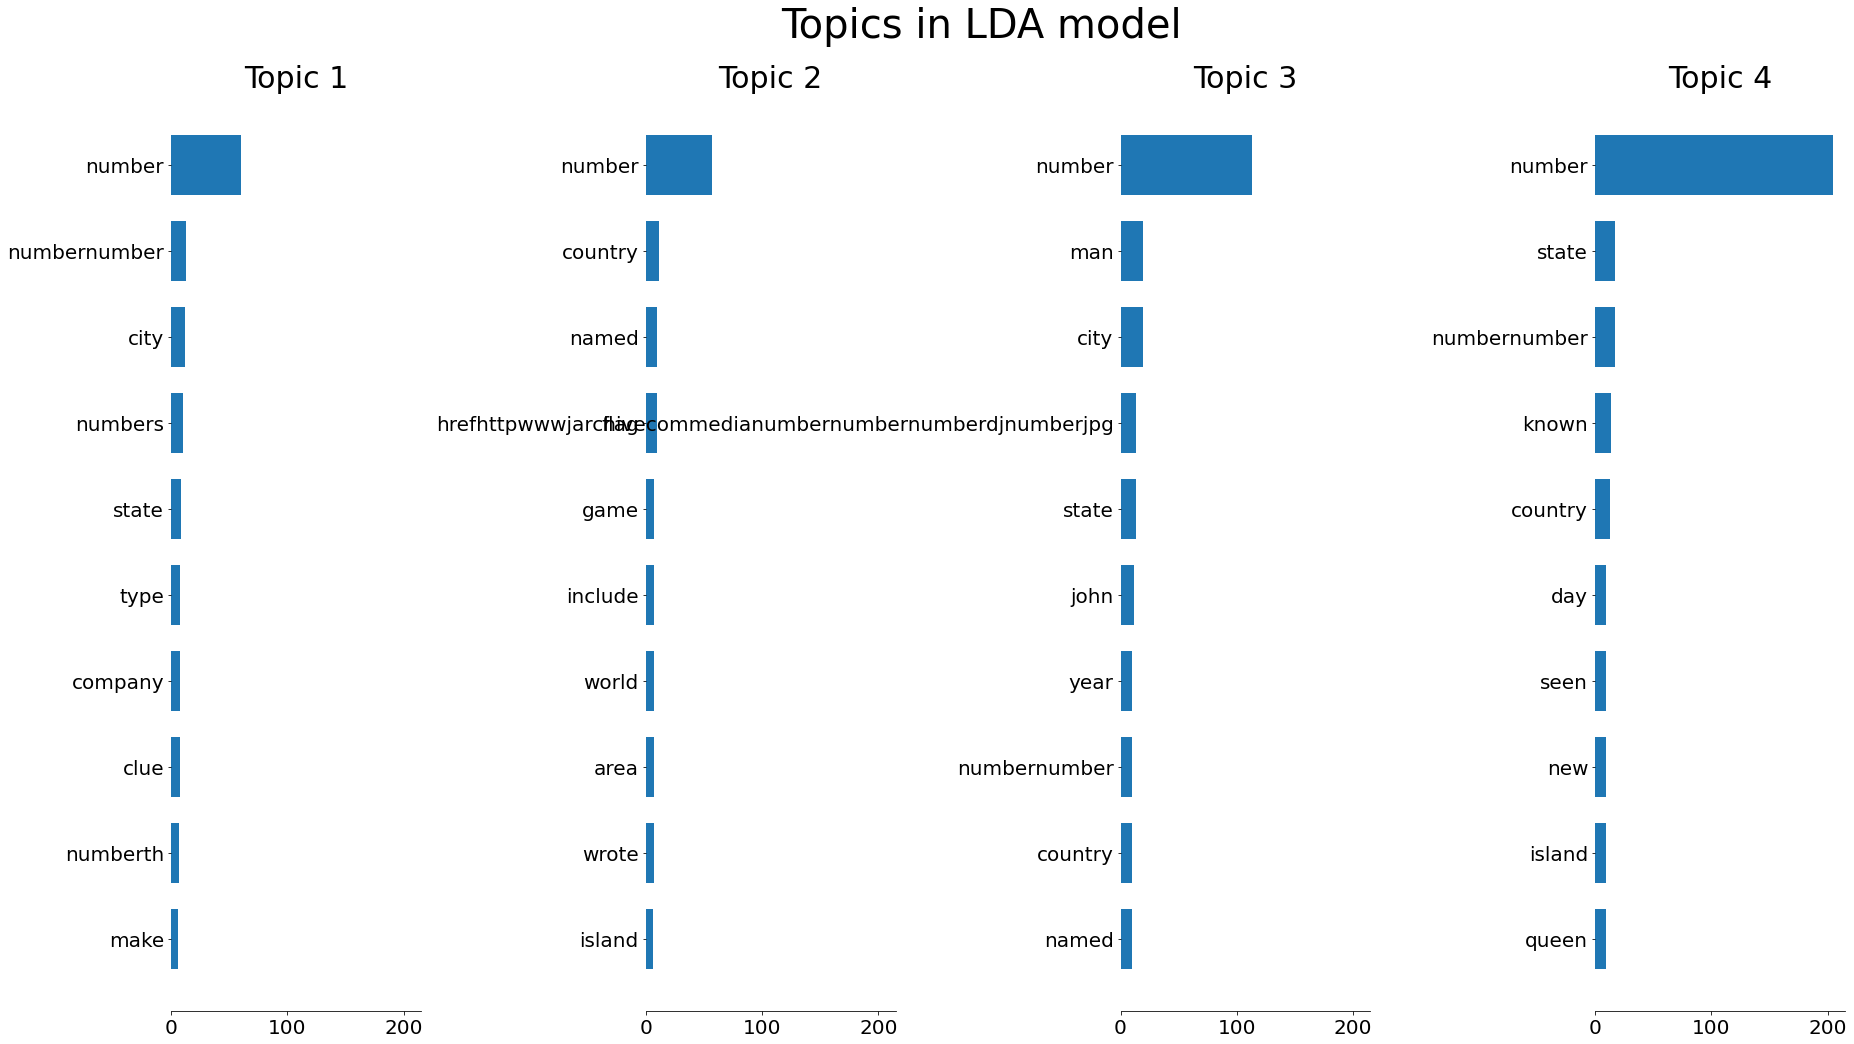

In [227]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(data.question[:1000])

lda = LatentDirichletAllocation(n_components=4, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names, 10, 'Topics in LDA model')